<small><i>Setember 2016 - This notebook was created by [Oriol Pujol Vila](http://www.maia.ub.es/~oriol). Source and [license](./LICENSE) info are in the folder.</i></small>

# Manifold and representation learning.

Non-linear dimensionality reduction is also called **manifold learning**. The basic hypothesis in manifold learning is that data lies in a manifold of intrinsic dimensionality smaller than the dimensionality of the original space. A nice example of a manifold is the well-known S-curve.

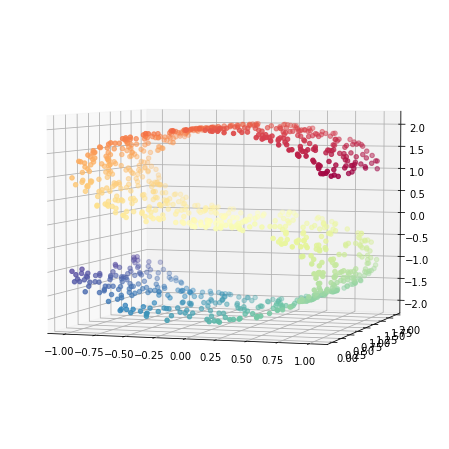

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

dataS, colorS = datasets.make_s_curve(1000, noise = 0.0,random_state=0)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataS[:, 0], dataS[:, 1], dataS[:, 2], c=colorS, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

## Multi Dimensional Scaling (MDS)

Metric MDS attempts to construct a constellation of points in Euclidean space by using information about the distances between the samples. Formally, it optimizes Kruskal's stress equation,

$$\underset{x'}{\text{minimize}} \quad\sum\limits_{j=1}^N\sum\limits_{i=1}^N \frac{(d_{i,j}-d'_{i,j})^2}{d_{i,j}^2} $$

where $d_{i,j} =\|x_i-x_j\|^2$ and $d'_{i,j} =\|x'_i-x'_j\|^2$, with $x\in {\bf R}^K$,  $x'\in {\bf R}^k$, $K>k$. The solution to this problem when distances are Euclidean is exactly the same as Principal Component Analysis. The value of this method is that it is defined for non Euclidean metric and in non-metric cases, where one attempts to have a good visualization.

The result is a mapping of the data that can be used for visualization but the application for mapping purposes requires recomputing the embedding.


DONE


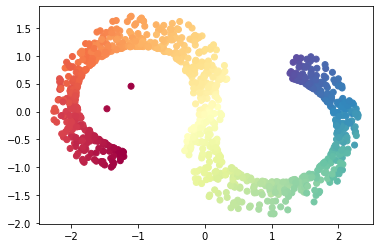

In [2]:
from sklearn import manifold
clf = manifold.MDS(n_components=2, max_iter=100, n_init=1,metric=True)
X_proj = clf.fit_transform(dataS)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=colorS, cmap=plt.cm.Spectral)
print ('DONE')

## Isomap

Isomap is an extension of MDS. The main idea is to perform MDS, not in the original space, but in the geodesic space of the nonlinear data manifold. The geodesic distances represent the shortest paths along the curved surface of the manifold measured as if the surface were flat. This can be approximated by a sequence of short steps between neighbouring sample points. Isomap then applies MDS to the geodesic rather than straight line distances to find a low-dimensional mapping that preserves these pairwise distances.

1. Construct a neighborhood graph. 
2. Compute shortest path (the geodesic distances) between all points.
3. Embed the data via MDS so as to preserve these distances.

Isomap can be used as a mapping technique.

DONE


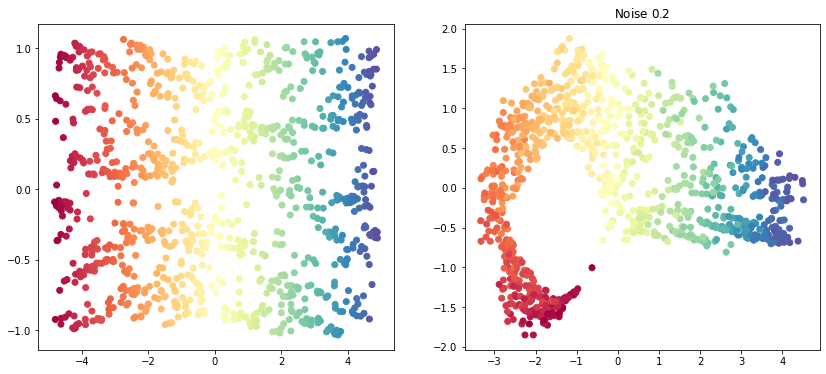

In [3]:
from sklearn import manifold
from sklearn import datasets
dataS, colorS = datasets.make_s_curve(1000,random_state=0)
dataSn, colorSn = datasets.make_s_curve(1000,noise = 0.2,random_state=0)

n_n = 10
clf = manifold.Isomap(n_neighbors=n_n)
X_proj = clf.fit_transform(dataS)
fig  = plt.figure(figsize=(14,6))
fig.add_subplot(121)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=colorS, cmap=plt.cm.Spectral)
clf = manifold.Isomap(n_neighbors=n_n)
X_proj = clf.fit_transform(dataSn)
fig.add_subplot(122)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=colorS, cmap=plt.cm.Spectral)
plt.title('Noise $0.2$')
print ('DONE')

## Locally Linear Embedding

Locally linear embedding addresses the problem of non-linear dimensionality reduction. It is based on linearly approximating the manifold around each sample and then finding the low dimensional representation that best reconstruct that sample according to the linear manifold. 
The algorithm roughly is as follows

1. Find the neighbours of each data sample $x_i$.
2. Compute the weights that best linearly reconstruct $x_i$ from its neighbours.
3. Find a low-dimensional embedding vector $x'_i$ that is best reconstructed by the weights determined in the previous step.

One can apply the local manifold found in the fitting procedure to new data but it is advisable not to use this kind of methods in a classification pipeline.

DONE


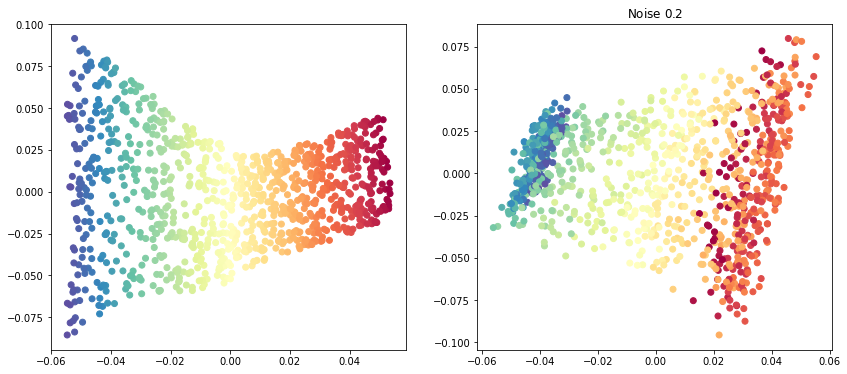

In [4]:
from sklearn import manifold
from sklearn import datasets
dataS, colorS = datasets.make_s_curve(1000,random_state=0)
dataSn, colorSn = datasets.make_s_curve(1000,noise = 0.2,random_state=0)

n_n = 12
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_n, n_components=2)
X_proj = clf.fit_transform(dataS)
fig  = plt.figure(figsize=(14,6))
fig.add_subplot(121)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=colorS, cmap=plt.cm.Spectral)
clf = manifold.LocallyLinearEmbedding(n_neighbors=n_n, n_components=2)
X_proj = clf.fit_transform(dataSn)
fig.add_subplot(122)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=colorS, cmap=plt.cm.Spectral)
plt.title('Noise $0.2$')
print ('DONE')

## T-Distributed Stochastic Neighbor Embedding

Stochastic Neighbor Embedding (SNE) changes the notion of distance to that of conditional probabilities. The similarity of a data point $x_i$ to $x_j$ is modelled by the conditional probability $p_{i|j}$ that $x_i$ would select $x_j$ as its neighbors if neighbors were selected in proportion to their pdf under a Gaussian centered at $x_j$. The similarity in the reduced space $q_{i|x}$ is modeled in the same way. 

$$p_{i|j} = \frac{e^{-\|x_i-x_j\|^2/2\sigma^2}}{\sum\limits_{j\neq k}e^{-\|x_j-x_k\|^2/2\sigma^2}}$$
and 
$$q_{i|j} = \frac{e^{-\|y_i-y_j\|^2/2}}{\sum\limits_{j\neq k}e^{-\|y_j-y_k\|^2/2}}$$

And this method attemps to minimizes the mismatch between the distributions using Kullback-Leibler divergence over all data points:

$$\text{minimize} \sum_i\sum_j p_{i|j} \log \frac{p_{i|j}}{q_{i|j}} $$

The notion of similarity in this definition is directional. This can produce some artifacts that can be circumvented using a symmetric approach as follows 
$$p_{ij} = \frac{p_{i|j}+p_{j|i}}{2}$$

T-SNE modifies this symmetric SNE by changing the Gaussian distribution in the projected space by a t-distribution, i.e.

$$q_{i|j} = \frac{(1-\|y_i-y_j\|^2)^{-1}}{\sum\limits_{j\neq k}{(1-\|y_j-y_k\|^2)^{-1}}}$$

The minimization is done using gradient descent. The parameter $\sigma$ is fixed by setting the perplexity value (i.e. $e^H_{ij}$) that can be interpreted as the soft version of the number of neighbors. Values between 5 an 50 are suggested.

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point  0  of  200 ...
Mean value of sigma:  0.21236582329249282
Iteration  10 : error is  20.489080629666038
Iteration  20 : error is  17.034945331193242
Iteration  30 : error is  16.41959518748265
Iteration  40 : error is  15.874553114474988
Iteration  50 : error is  14.457216573655082
Iteration  60 : error is  13.312087040925038
Iteration  70 : error is  12.707902222710427
Iteration  80 : error is  12.845273990064332
Iteration  90 : error is  13.093306418996832
Iteration  100 : error is  12.182626620128033
Iteration  110 : error is  1.7857558280838397
Iteration  120 : error is  1.166963537248779
Iteration  130 : error is  0.8139190715837591
Iteration  140 : error is  0.6465545261602428
Iteration  150 : error is  0.5215038853253626
Iteration  160 : error is  0.48315238740121996
Iteration  170 : error is  0.4683957832157691
Iteration  180 : error is  0.4571350633207066
Iteration  190 : error is  

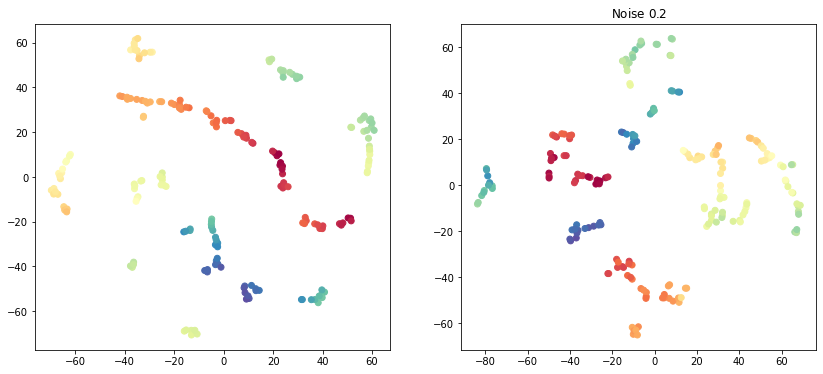

In [5]:
from sklearn import datasets
import tsne

dataS, colorS = datasets.make_s_curve(200,random_state=0)
dataSn, colorSn = datasets.make_s_curve(200,noise = 0.2,random_state=0)

X_proj = tsne.tsne(dataS, no_dims=2, initial_dims=3, perplexity=5.0);
fig  = plt.figure(figsize=(14,6))
fig.add_subplot(121)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=colorS, cmap=plt.cm.Spectral)
X_proj = tsne.tsne(dataSn, no_dims=2, initial_dims=3, perplexity=5.0);
fig.add_subplot(122)
plt.scatter(X_proj[:, 0], X_proj[:, 1], c=colorS, cmap=plt.cm.Spectral)
plt.title('Noise $0.2$')
print ('DONE')